2024-05-14 08:15:24.424928: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 08:15:24.638518: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 08:15:24.792450: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 08:15:26.132217: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model inste

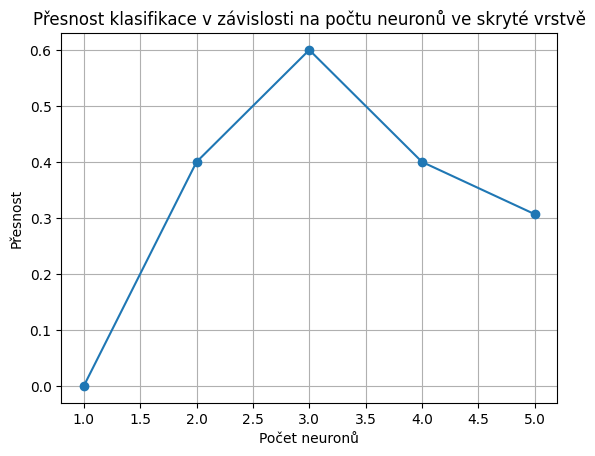

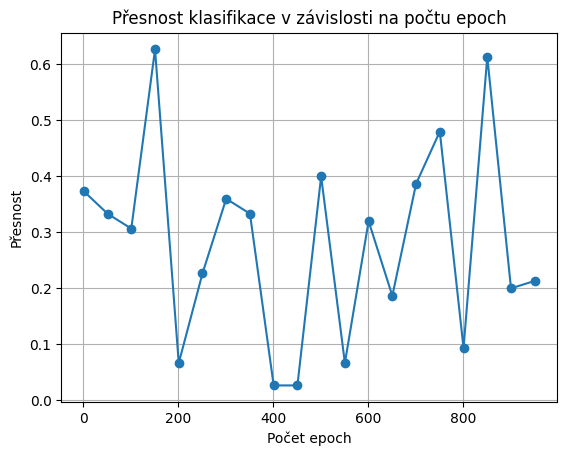

In [4]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Načtení datového setu IRIS
iris = load_iris()
X = iris.data
y = iris.target

# Rozdělení dat na trénovací a testovací množinu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

# Normalizace dat
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)

# Definice funkce pro vytvoření modelu
def create_model(num_neurons):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_neurons, activation='relu', input_shape=(4,)),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Funkce pro trénování modelu s určeným počtem neuronů ve skryté vrstvě
def train_model(num_neurons, epochs):
    model = create_model(num_neurons)
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0)
    return history

# Funkce pro vyhodnocení modelu
def evaluate_model(model):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy

# Experimentování s různým počtem neuronů ve skryté vrstvě
hidden_layer_neurons = [1, 2, 3, 4, 5]
accuracies_neurons = []

for num_neurons in hidden_layer_neurons:
    model = create_model(num_neurons)
    history = train_model(num_neurons, epochs=100)
    accuracy = evaluate_model(model)
    accuracies_neurons.append(accuracy)

# Vykreslení grafu závislosti přesnosti na počtu neuronů ve skryté vrstvě
plt.plot(hidden_layer_neurons, accuracies_neurons, marker='o')
plt.title('Přesnost klasifikace v závislosti na počtu neuronů ve skryté vrstvě')
plt.xlabel('Počet neuronů')
plt.ylabel('Přesnost')
plt.grid(True)
plt.show()

# Experimentování s různým počtem epoch
epochs = list(range(1, 1001, 50))
accuracy_epochs = []

for epoch in epochs:
    model = create_model(4)  # Použijeme 4 neurony ve skryté vrstvě
    history = train_model(4, epochs=epoch)
    accuracy = evaluate_model(model)
    accuracy_epochs.append(accuracy)

# Vykreslení grafu závislosti přesnosti na počtu epoch
plt.plot(epochs, accuracy_epochs, marker='o')
plt.title('Přesnost klasifikace v závislosti na počtu epoch')
plt.xlabel('Počet epoch')
plt.ylabel('Přesnost')
plt.grid(True)
plt.show()



# Dopředná neuronová síť pro rozpoznávání ručně psaných číslic (datový set DIGITS)

V tomto notebooku provedeme experiment s dopřednou neuronovou sítí pro rozpoznávání ručně psaných číslic z datového setu DIGITS. Experimentovat budeme s různým počtem neuronů ve skryté vrstvě v rozsahu 1 až 20.

## Načtení potřebných knihoven

```python
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
```

In [7]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
# Načtení datového setu DIGITS
digits = load_digits()
X = digits.data
y = digits.target

# Rozdělení dat na trénovací a testovací množinu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Normalizace dat
X_train = X_train / 16.0
X_test = X_test / 16.0

In [9]:
# Definice funkce pro vytvoření modelu
def create_model(num_neurons):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_neurons, activation='relu', input_shape=(64,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Funkce pro trénování modelu s určeným počtem neuronů ve skryté vrstvě
def train_model(num_neurons, epochs):
    model = create_model(num_neurons)
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0)
    return history

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


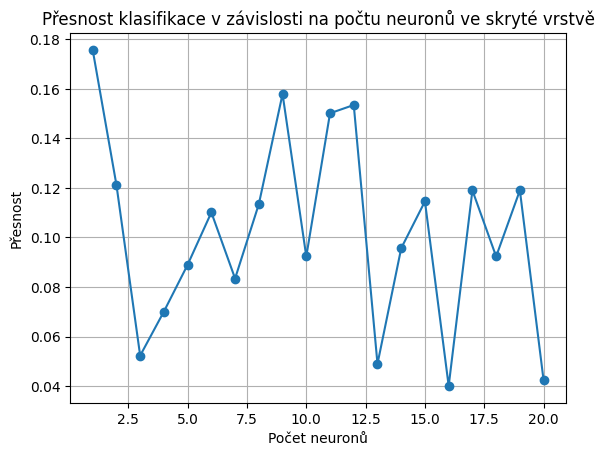

In [10]:
# Experimentování s různým počtem neuronů ve skryté vrstvě
hidden_layer_neurons = list(range(1, 21))
accuracies_neurons = []

for num_neurons in hidden_layer_neurons:
    model = create_model(num_neurons)
    history = train_model(num_neurons, epochs=100)
    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    accuracies_neurons.append(accuracy)

# Vykreslení grafu závislosti přesnosti na počtu neuronů ve skryté vrstvě
plt.plot(hidden_layer_neurons, accuracies_neurons, marker='o')
plt.title('Přesnost klasifikace v závislosti na počtu neuronů ve skryté vrstvě')
plt.xlabel('Počet neuronů')
plt.ylabel('Přesnost')
plt.grid(True)
plt.show()

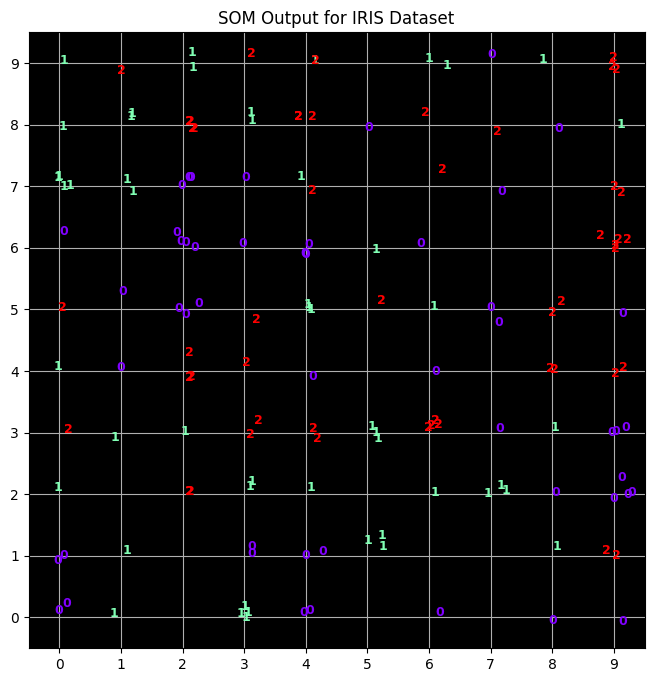

In [14]:
import numpy as np
from sklearn.datasets import load_iris
from minisom import MiniSom
import matplotlib.pyplot as plt

# Načtení datového setu IRIS
iris = load_iris()
data = iris.data
target = iris.target

# Vytvoření a trénování SOM
som_dim = (10, 10)  # Rozměry SOM (10x10)
som = MiniSom(som_dim[0], som_dim[1], data.shape[1], sigma=0.3, learning_rate=0.5)
som.random_weights_init(data)
som.train_random(data, 100)  # Trénování SOM

# Výstup SOM
winners = np.array([som.winner(x) for x in data])

# Vytvoření Scatter plotu pro vizualizaci výstupu sítě
plt.figure(figsize=(10, 8))
for i, x in enumerate(data):
    plt.text(winners[i][0] + np.random.randn(1)*0.1, 
             winners[i][1] + np.random.randn(1)*0.1,
             str(target[i]), color=plt.cm.rainbow(target[i] / 2.0), fontdict={'weight': 'bold', 'size': 9})

plt.title('SOM Output for IRIS Dataset')
plt.xticks(np.arange(som_dim[0]))
plt.yticks(np.arange(som_dim[1]))
plt.grid()
plt.imshow(np.zeros(som_dim + (3,)), origin='lower')
plt.show()



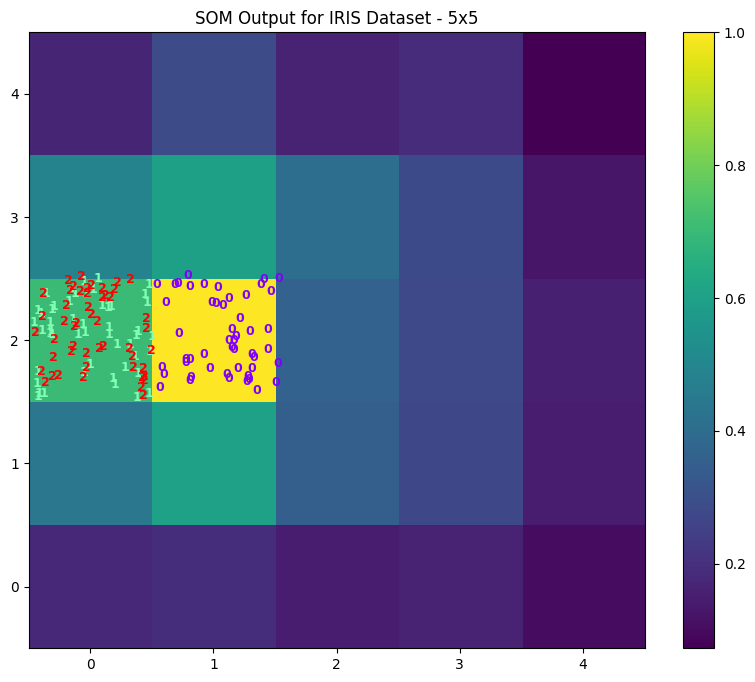

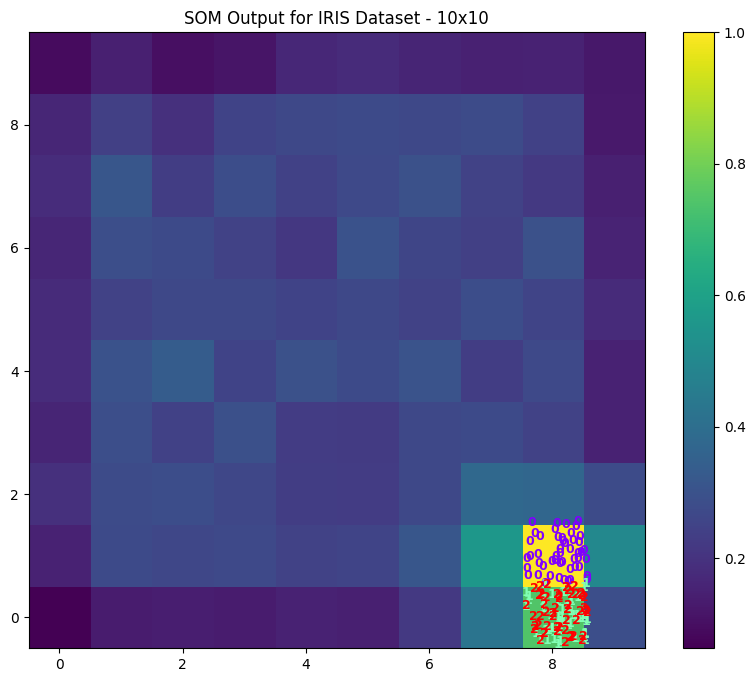

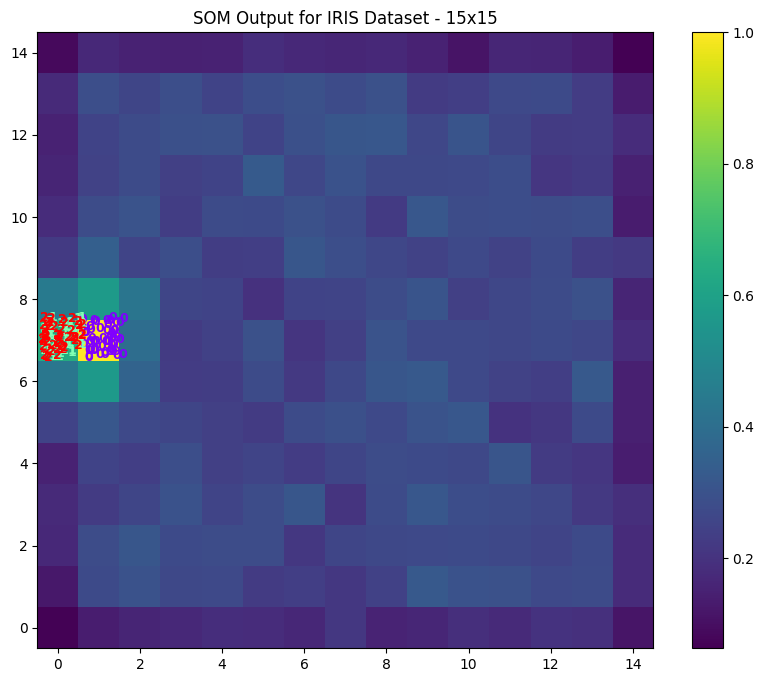

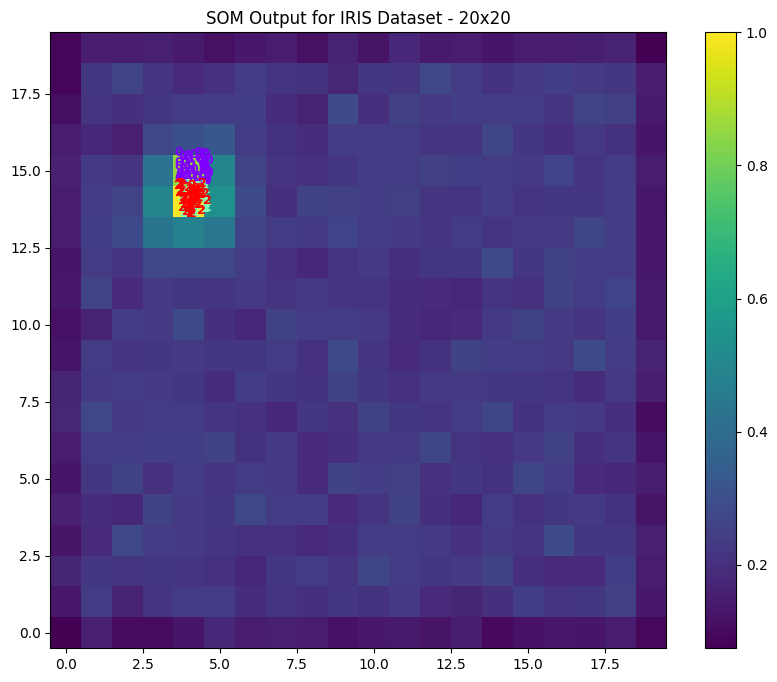

In [16]:
import numpy as np
from sklearn.datasets import load_iris
from minisom import MiniSom
import matplotlib.pyplot as plt

# Načtení datového setu IRIS
iris = load_iris()
data = iris.data
target = iris.target

# Funkce pro vytvoření a trénování SOM
def train_som(dimensions):
    som = MiniSom(dimensions[0], dimensions[1], data.shape[1], sigma=0.5, learning_rate=0.5)
    som.train_random(data, 100)
    return som

# Funkce pro vizualizaci Scatter plotu
def plot_som(som, dimensions):
    plt.figure(figsize=(10, 8))
    for i, x in enumerate(data):
        winner = som.winner(x)
        plt.text(winner[0] + np.random.rand() - 0.5, winner[1] + np.random.rand() - 0.5, str(target[i]), color=plt.cm.rainbow(target[i] / 2.0), fontdict={'weight': 'bold', 'size': 9})
    plt.title(f'SOM Output for IRIS Dataset - {dimensions[0]}x{dimensions[1]}')
    plt.imshow(som.distance_map().T, origin='lower')
    plt.colorbar()
    plt.show()

# Experimentování s různými rozměry SOM
dimensions_list = [(5, 5), (10, 10), (15, 15), (20, 20)]

for dimensions in dimensions_list:
    som = train_som(dimensions)
    plot_som(som, dimensions)

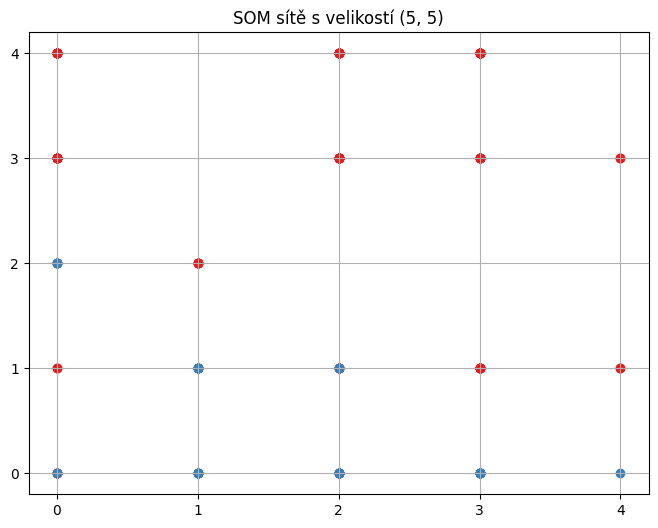

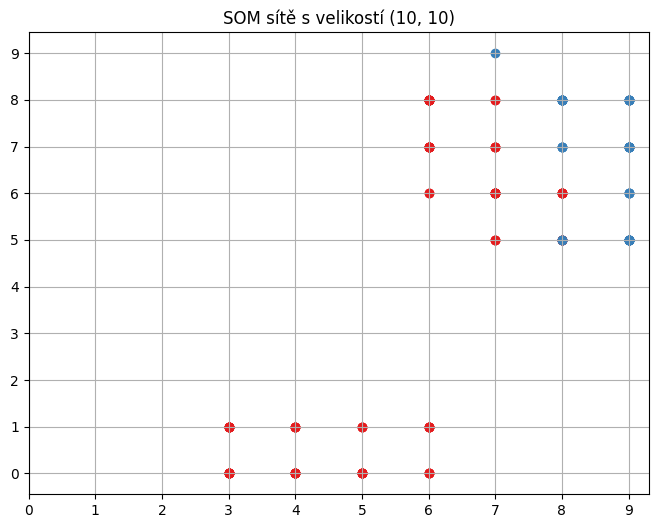

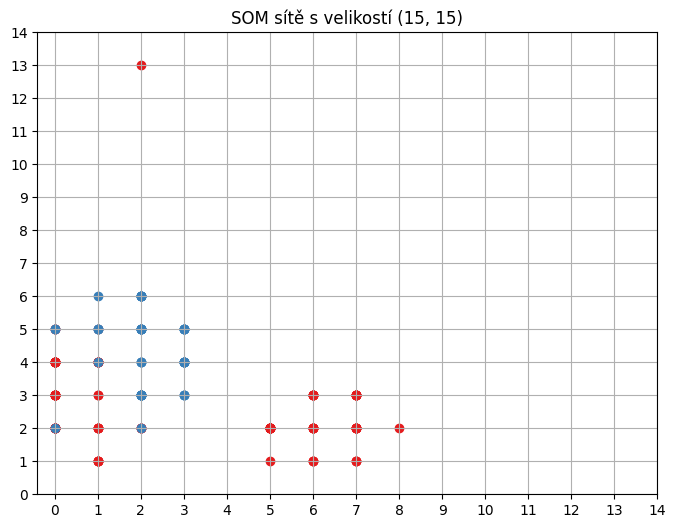

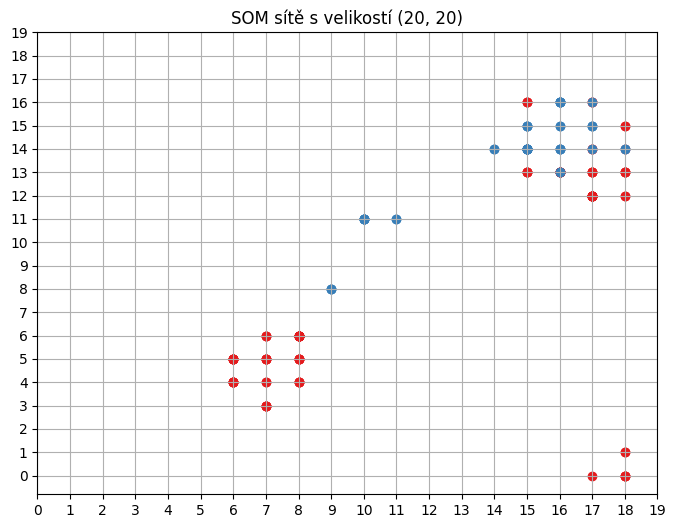

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn_som.som import SOM


# Načtení dat IRIS
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Normalizace dat
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Funkce pro vykreslení scatter plotu
def find_bmu(som, x):
    # Calculate distance between x and each weight
    distance = np.linalg.norm(x - som.weights, axis=1)
    # Find index of best matching unit
    return np.argmin(distance)

def plot_som(som, X, y, title):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    for i, (x, label) in enumerate(zip(X, y)):
        bmu_index = find_bmu(som, x)
        bmu_position = np.unravel_index(bmu_index, (som.m, som.n))
        plt.scatter(bmu_position[1], bmu_position[0], color=plt.cm.Set1(label / 10.), label=label)
    plt.xticks(np.arange(som.m))
    plt.yticks(np.arange(som.n))
    plt.grid(True)
    plt.show()

# Experiment s různými velikostmi sítě
for size in [(5, 5), (10, 10), (15, 15), (20, 20)]:
    som = SOM(size[0], size[1], X_normalized.shape[1])  # Specify the number of features in the input data
    som.fit(X_normalized)

    plot_som(som, X_normalized, y, f"SOM sítě s velikostí {size}")


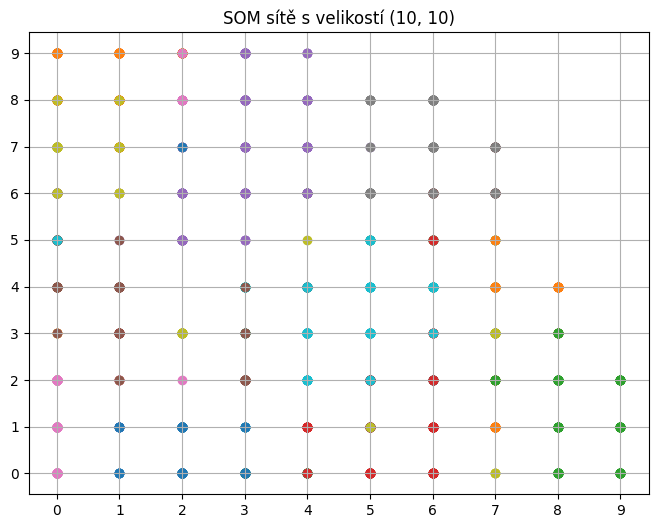

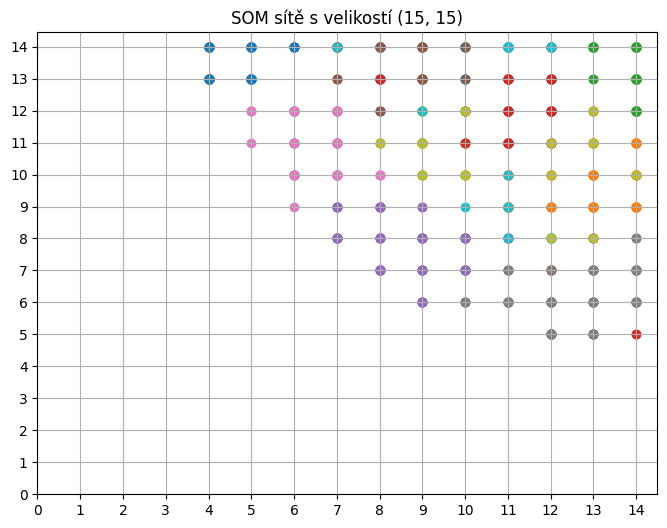

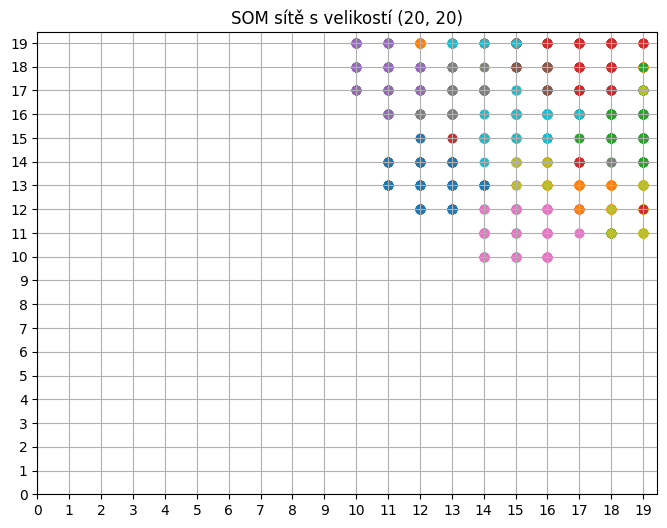

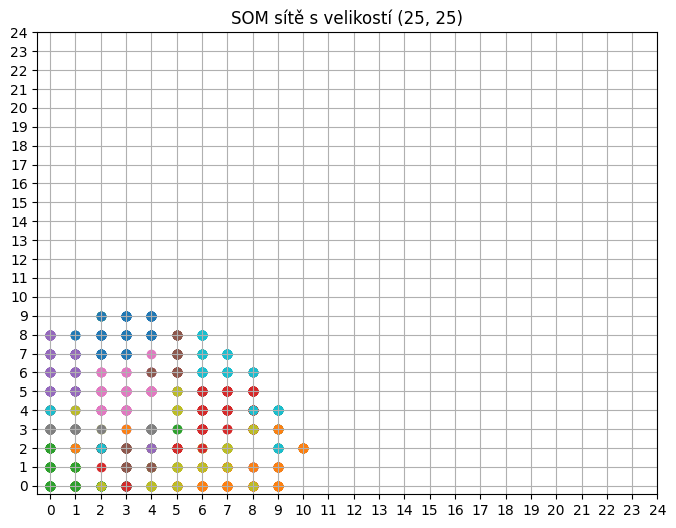

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn_som.som import SOM


# Načtení dat DIGITS
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Normalizace dat
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Funkce pro vykreslení scatter plotu
def find_bmu(som, x):
    # Calculate distance between x and each weight
    distance = np.linalg.norm(x - som.weights, axis=1)
    # Find index of best matching unit
    return np.argmin(distance)

def plot_som(som, X, y, title):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    for i, (x, label) in enumerate(zip(X, y)):
        bmu_index = find_bmu(som, x)
        bmu_position = np.unravel_index(bmu_index, (som.m, som.n))
        plt.scatter(bmu_position[1], bmu_position[0], color=plt.cm.tab10(label / 10.))
    plt.xticks(np.arange(som.m))
    plt.yticks(np.arange(som.n))
    plt.grid(True)
    plt.show()

# Experiment s různými velikostmi sítě
for size in [(10, 10), (15, 15), (20, 20), (25, 25)]:
    som = SOM(size[0], size[1], X_normalized.shape[1])  # Specify the number of features in the input data
    som.fit(X_normalized)

    plot_som(som, X_normalized, y, f"SOM sítě s velikostí {size}")


2024-05-14 09:17:51.575009: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 09:17:52.700117: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 09:17:54.942065: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 09:17:58.298126: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model inste

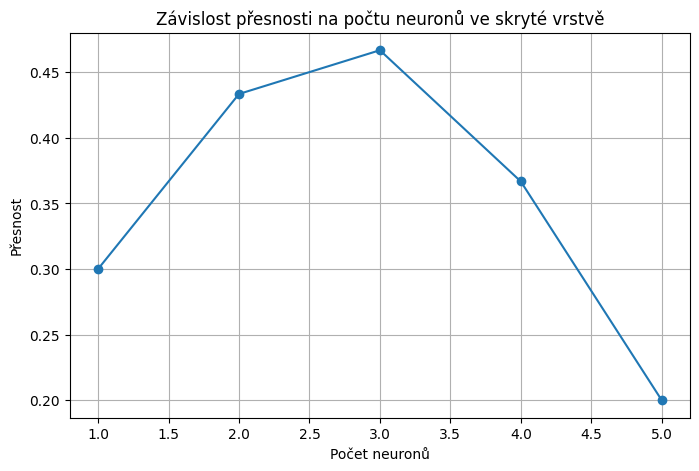

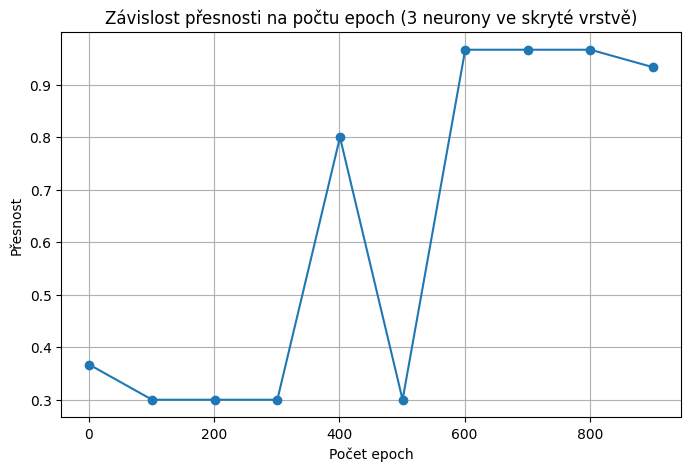

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Načtení datového setu
iris = load_iris()
X = iris.data
y = iris.target

# Rozdělení dat na trénovací a testovací množinu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Funkce pro vytvoření a trénování modelu s daným počtem neuronů ve skryté vrstvě
def train_model(num_neurons, epochs):
    model = Sequential([
        Dense(num_neurons, activation='relu', input_shape=(4,)),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0)
    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    return history, accuracy

# Experimenty s různým počtem neuronů ve skryté vrstvě
hidden_layer_neurons = [1, 2, 3, 4, 5]
accuracies_neurons = []

for num_neurons in hidden_layer_neurons:
    _, accuracy = train_model(num_neurons, epochs=100)
    accuracies_neurons.append(accuracy)

# Vykreslení grafu závislosti přesnosti na počtu neuronů ve skryté vrstvě
plt.figure(figsize=(8, 5))
plt.plot(hidden_layer_neurons, accuracies_neurons, marker='o')
plt.title('Závislost přesnosti na počtu neuronů ve skryté vrstvě')
plt.xlabel('Počet neuronů')
plt.ylabel('Přesnost')
plt.grid(True)
plt.show()

# Experimenty s různým počtem epoch
num_neurons = 3  # Zvolený počet neuronů ve skryté vrstvě
epochs_range = range(1, 1001, 100)
accuracies_epochs = []

for epochs in epochs_range:
    _, accuracy = train_model(num_neurons, epochs=epochs)
    accuracies_epochs.append(accuracy)

# Vykreslení grafu závislosti přesnosti na počtu epoch
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, accuracies_epochs, marker='o')
plt.title('Závislost přesnosti na počtu epoch (3 neurony ve skryté vrstvě)')
plt.xlabel('Počet epoch')
plt.ylabel('Přesnost')
plt.grid(True)
plt.show()


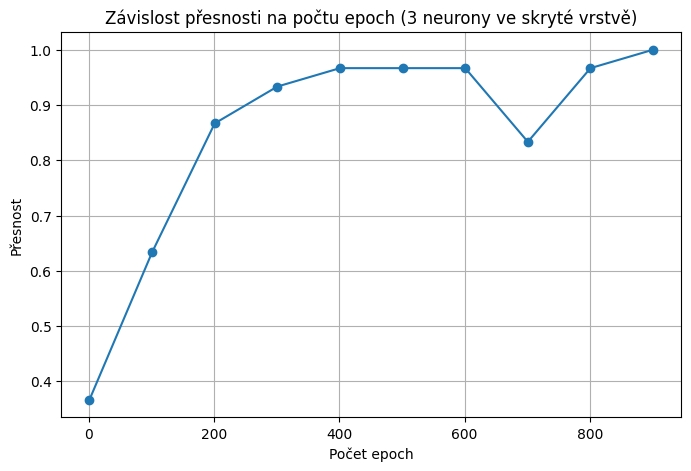

In [16]:
# Experimenty s různým počtem epoch
num_neurons = 5  # Zvolený počet neuronů ve skryté vrstvě
epochs_range = range(1, 1001, 100)
accuracies_epochs = []

for epochs in epochs_range:
    _, accuracy = train_model(num_neurons, epochs=epochs)
    accuracies_epochs.append(accuracy)

# Vykreslení grafu závislosti přesnosti na počtu epoch
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, accuracies_epochs, marker='o')
plt.title('Závislost přesnosti na počtu epoch (3 neurony ve skryté vrstvě)')
plt.xlabel('Počet epoch')
plt.ylabel('Přesnost')
plt.grid(True)
plt.show()

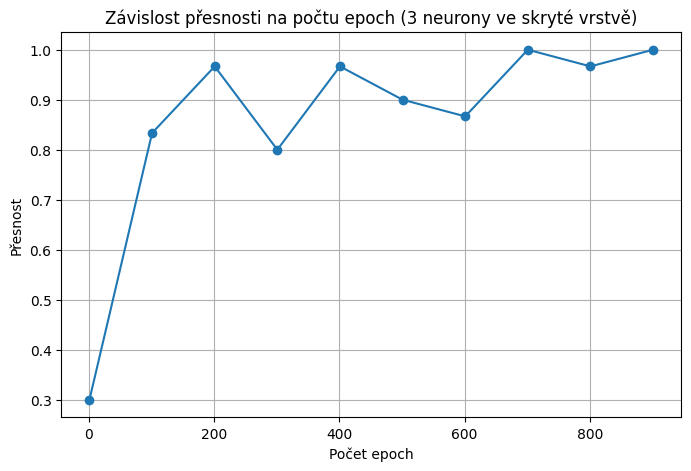

In [17]:
# Experimenty s různým počtem epoch
num_neurons = 4  # Zvolený počet neuronů ve skryté vrstvě
epochs_range = range(1, 1001, 100)
accuracies_epochs = []

for epochs in epochs_range:
    _, accuracy = train_model(num_neurons, epochs=epochs)
    accuracies_epochs.append(accuracy)

# Vykreslení grafu závislosti přesnosti na počtu epoch
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, accuracies_epochs, marker='o')
plt.title('Závislost přesnosti na počtu epoch (3 neurony ve skryté vrstvě)')
plt.xlabel('Počet epoch')
plt.ylabel('Přesnost')
plt.grid(True)
plt.show()

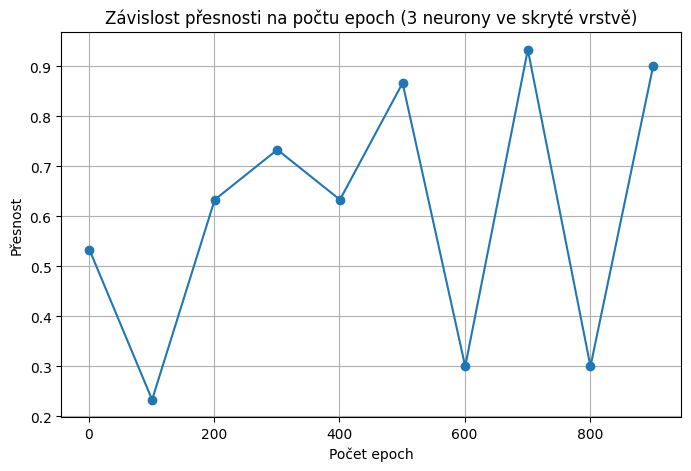

In [18]:
# Experimenty s různým počtem epoch
num_neurons = 2  # Zvolený počet neuronů ve skryté vrstvě
epochs_range = range(1, 1001, 100)
accuracies_epochs = []

for epochs in epochs_range:
    _, accuracy = train_model(num_neurons, epochs=epochs)
    accuracies_epochs.append(accuracy)

# Vykreslení grafu závislosti přesnosti na počtu epoch
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, accuracies_epochs, marker='o')
plt.title('Závislost přesnosti na počtu epoch (3 neurony ve skryté vrstvě)')
plt.xlabel('Počet epoch')
plt.ylabel('Přesnost')
plt.grid(True)
plt.show()

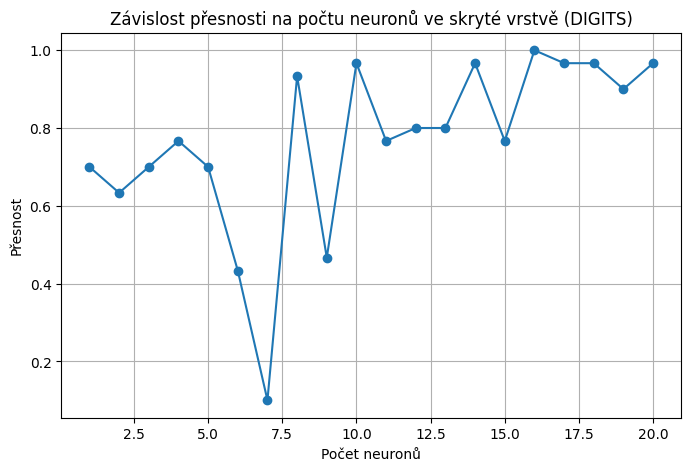

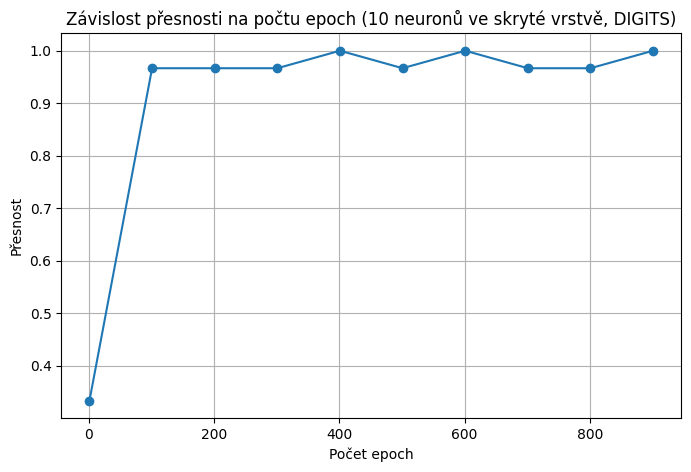

In [19]:
from sklearn.datasets import load_digits

# Načtení datového setu DIGITS
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Rozdělení dat na trénovací a testovací množinu
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

# Experimenty s různým počtem neuronů ve skryté vrstvě
hidden_layer_neurons_digits = range(1, 21)
accuracies_neurons_digits = []

for num_neurons in hidden_layer_neurons_digits:
    _, accuracy = train_model(num_neurons, epochs=100)
    accuracies_neurons_digits.append(accuracy)

# Vykreslení grafu závislosti přesnosti na počtu neuronů ve skryté vrstvě pro DIGITS
plt.figure(figsize=(8, 5))
plt.plot(hidden_layer_neurons_digits, accuracies_neurons_digits, marker='o')
plt.title('Závislost přesnosti na počtu neuronů ve skryté vrstvě (DIGITS)')
plt.xlabel('Počet neuronů')
plt.ylabel('Přesnost')
plt.grid(True)
plt.show()

# Experimenty s různým počtem epoch
num_neurons_digits = 10  # Zvolený počet neuronů ve skryté vrstvě
epochs_range_digits = range(1, 1001, 100)
accuracies_epochs_digits = []

for epochs in epochs_range_digits:
    _, accuracy = train_model(num_neurons_digits, epochs=epochs)
    accuracies_epochs_digits.append(accuracy)

# Vykreslení grafu závislosti přesnosti na počtu epoch pro DIGITS
plt.figure(figsize=(8, 5))
plt.plot(epochs_range_digits, accuracies_epochs_digits, marker='o')
plt.title('Závislost přesnosti na počtu epoch (10 neuronů ve skryté vrstvě, DIGITS)')
plt.xlabel('Počet epoch')
plt.ylabel('Přesnost')
plt.grid(True)
plt.show()


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/pytho

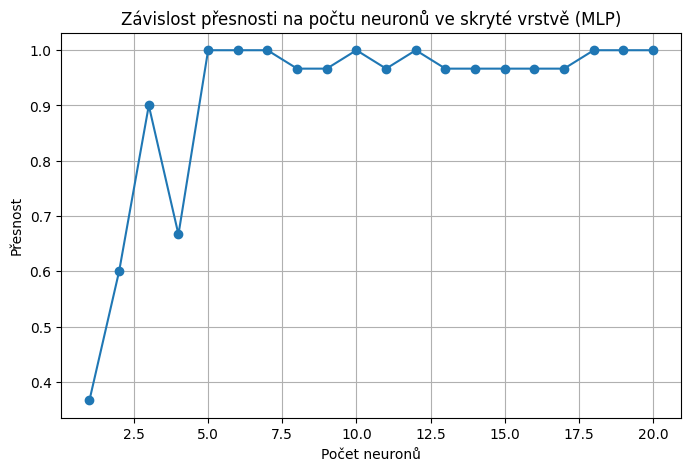

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Načtení datového setu IRIS
iris = load_iris()
X = iris.data
y = iris.target

# Rozdělení dat na trénovací a testovací množinu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Experimenty s různým počtem neuronů ve skryté vrstvě
hidden_layer_neurons = range(1, 21)
accuracies_neurons = []

for num_neurons in hidden_layer_neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(num_neurons,), max_iter=1000)
    mlp.fit(X_train, y_train)
    accuracy = mlp.score(X_test, y_test)
    accuracies_neurons.append(accuracy)

# Vykreslení grafu závislosti přesnosti na počtu neuronů ve skryté vrstvě
plt.figure(figsize=(8, 5))
plt.plot(hidden_layer_neurons, accuracies_neurons, marker='o')
plt.title('Závislost přesnosti na počtu neuronů ve skryté vrstvě (MLP)')
plt.xlabel('Počet neuronů')
plt.ylabel('Přesnost')
plt.grid(True)
plt.show()


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


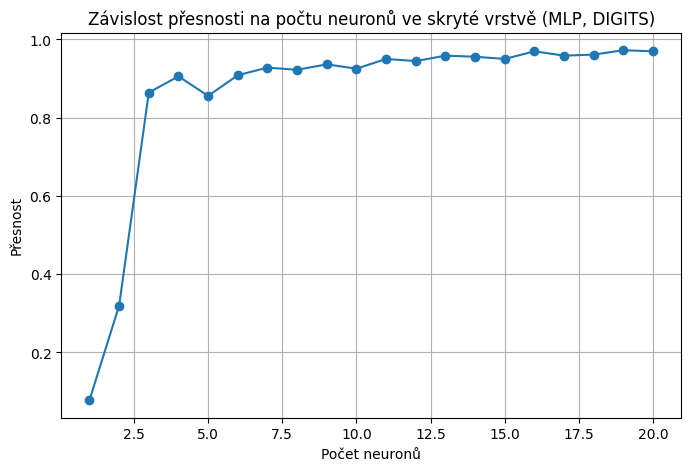

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Načtení datového setu DIGITS
digits = load_digits()
X = digits.data
y = digits.target

# Rozdělení dat na trénovací a testovací množinu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Experimenty s různým počtem neuronů ve skryté vrstvě
hidden_layer_neurons = range(1, 21)
accuracies_neurons = []

for num_neurons in hidden_layer_neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(num_neurons,), max_iter=1000)
    mlp.fit(X_train, y_train)
    accuracy = mlp.score(X_test, y_test)
    accuracies_neurons.append(accuracy)

# Vykreslení grafu závislosti přesnosti na počtu neuronů ve skryté vrstvě
plt.figure(figsize=(8, 5))
plt.plot(hidden_layer_neurons, accuracies_neurons, marker='o')
plt.title('Závislost přesnosti na počtu neuronů ve skryté vrstvě (MLP, DIGITS)')
plt.xlabel('Počet neuronů')
plt.ylabel('Přesnost')
plt.grid(True)
plt.show()
